## Objetivos

  - Apresentar e utilizar o classificador k-nearest neighbours (kNN)
  - Apresentar a técnica de separação de dados (treino e teste)
  - Avaliar Aprendizagem do modelo

  

## Começando

Vamos dar continuidade ao nosso estudo de aprendizagem de máquina, já vimos:

 - Tudo começa, conhecendo os dados disponíveis.
 - Como carregar um data frame
 - Como visualizar os dados em gráficos (histograma, box plot, violin plot, matriz de confusão)
 - Fizemos uma breve introdução sobre análise exploratória buscando correlacionar os dados para gerar informações.

 Hoje, vamos seguir nossa jornada e finalizar nosso estudo aplicando a técnica de KNN.



## k-Nearest Neighbors

O KNN(K vizinhos mais próximos) é considerado um dos algoritmos mais simples dentro da categoria de ***aprendizagem supervisionada*** sendo muito utilizado para problemas de classificação, porém também pode ser utilizado em problemas de regressão.

***Problemas de classificação*** = Vale lembrar que em problemas de classificação não estamos interessados em valores exatos, queremos apenas saber se um dado pertence ou não a uma dada classe.

### Uma intuição sobre o método

Para realizar a classificação o KNN calcula a distância objeto desconhecido (target) para todos os outros elementos, encontra os mais K vizinhos mais próximos faz uma contagem dos rótulos e considera que o objeto desconhecido pertence ao rótulo de maior contagem.

A imagem abaixo exemplifica o funcionamento, mas se ficou um pouco complicado de entender, rode o script python ***iknn.py*** e faça algumas simulações para compreender.



![knn](/aulas/lab02/knn.png)
<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab02/knn.png?raw=1">



## Bora lá!!

Vamos juntos realizar nosso primeiro projeto, do começo ao fim, de aprendizagem de máquina.



## Definição do problema

A primeira coisa que precisamos fazer é a definição do problema. Neste primeiro caso vamos trabalhar com o mesmo dataset da última aula, dataset iris. Vamos desenvolver um sistema de machine learning capaz de classificar sua espécie com base nos dimensionais da pétala.



São 150 exemplares de flor de íris, pertencentes a três espécies diferentes: **setosa**, **versicolor** e **virginica**, sendo 50 amostras de cada espécie. Os atributos de largura e comprimento de sépala e largura e comprimento de pétala de cada flor fooram medidos manualmente.

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png">

### Desafio 1

Do ponto de vista de machine learning, que problema é esse:

    Aprendizado supervisionado ou não-supervisionado?

R: Supervisionado

    Classificação ou regressão?

R: Classificação


In [ ]:
### Sua resposta.....
Aprendizado Supervisionado e de classificação


In [1]:
# Inicializção das bibliotecas
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Caminho do arquivo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Define o nome das colunas
header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
# Lê e carrega o arquivo para a memória
df = pd.read_csv(url, header=None, names=header)

In [3]:
# Retorna um trecho com as 5 primeiras linhas do dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Mostra informações sobre o dataframe em si
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# class distribution
print(df.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Desafio 2

Aplique os métodos que achar conveniente (vimos algumas opções na última aula) para visualizar os dados de forma gráfica.


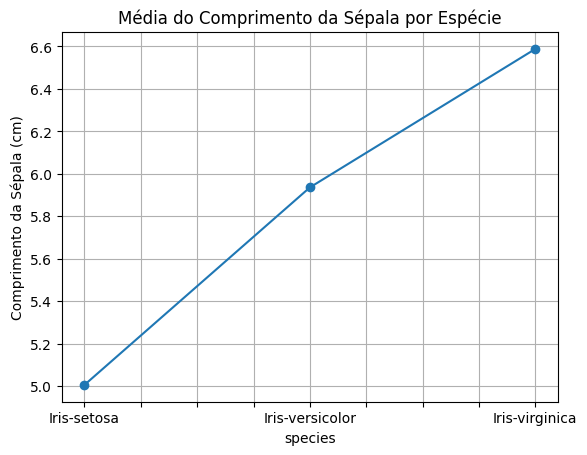

In [11]:
## Sua resposta e seus gráficos para análisar..

import matplotlib.pyplot as plt
import seaborn as sns

grouped = df.groupby('species')['sepal_length'].mean()
grouped.plot(kind='line', marker='o')


plt.title('Média do Comprimento da Sépala por Espécie')
plt.ylabel('Comprimento da Sépala (cm)')
plt.grid(True)
plt.show()

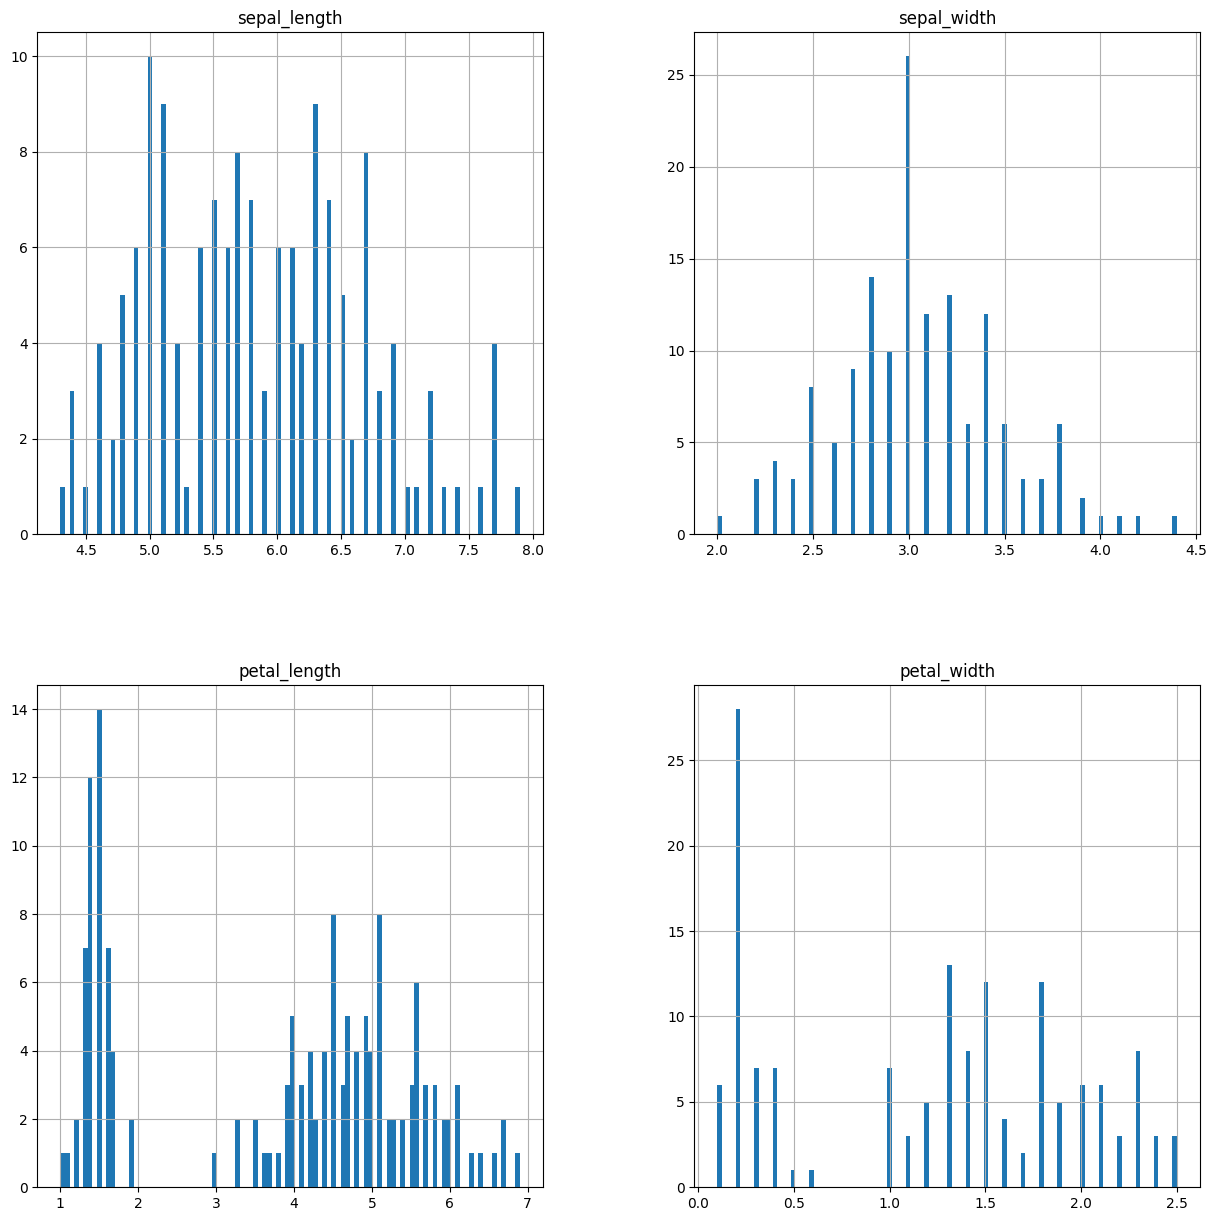

In [12]:
df.hist(bins=100, figsize=(15, 15))
plt.show()

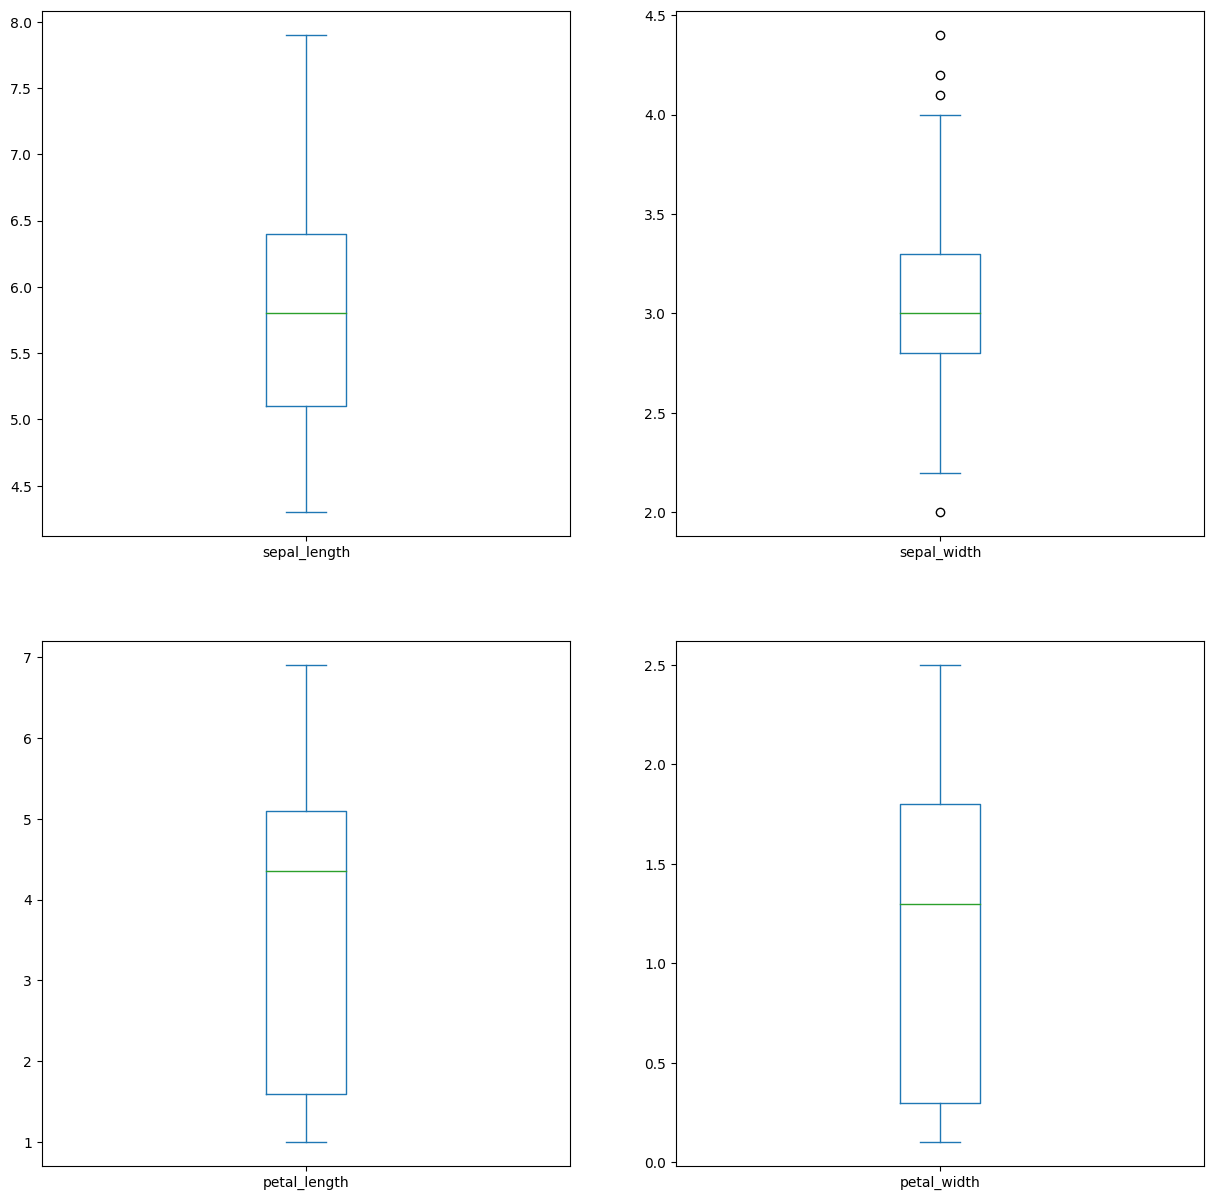

In [13]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(15, 15))
plt.show()

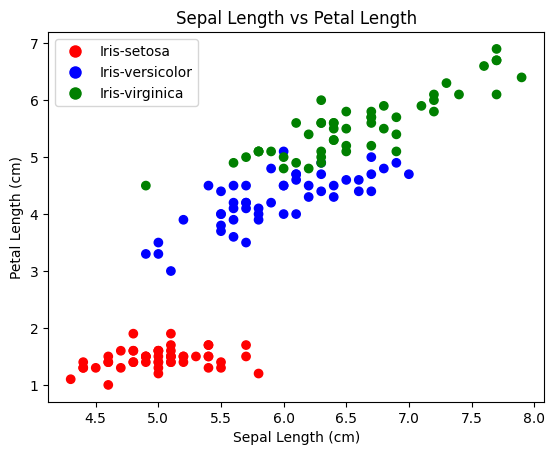

In [14]:
colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}

plt.scatter(df['sepal_length'], df['petal_length'], c=df['species'].map(colors), label=colors)

plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors.values()], labels=colors.keys())
plt.show()

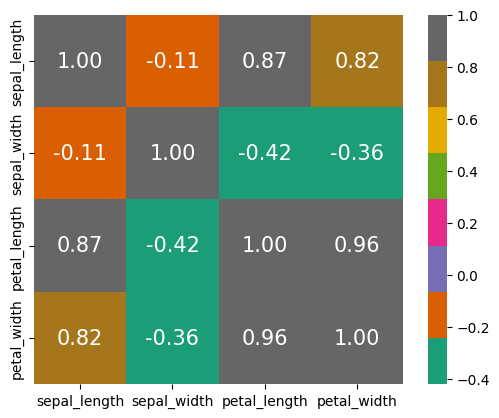

In [15]:
cols = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
corr_matx = df[cols].corr()

heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Dark2')

## PARE!!!

A análise feita no desafio 2 é uma das etapas mais importantes. Caso você tenha pulado essa etapa, volte e faça suas análises.

Com essa etapa concluída, vamos criar um sub-dataset com os atributos que serão utilizados.


In [16]:
# Selecionando um sub-dataframe com os campos petal_length e petal_width,
# e outro com a variável de classes
entradas = df[['petal_length', 'petal_width']]
classes = df['species']
print(f"Formato das tabelas de dados {entradas.shape} e classes {classes.shape}")

Formato das tabelas de dados (150, 2) e classes (150,)


## Dividindo os dados em conjunto de treinamento e de testes

Dividir nosso dataset em dois conjuntos de dados.
    
    Treinamento - Representa 80% das amostras do conjunto de dados original,
    Teste - com 20% das amostras

Vamos escolher aleatoriamente algumas amostras do conjunto original. Isto pode ser feito com Scikit-Learn usando a função ***train_test_split()***

***scikit-learn***: pip3 install scikit-learn



In [17]:
# Separamos 20% para o teste
from sklearn.model_selection import train_test_split

entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

Formato das tabelas de dados de treino (120, 2) e teste (30, 2)


In [18]:
#Primeiras linhas do dataframe
entradas_treino.head()

,petal_length,petal_width
2,1.3,0.2
4,1.4,0.2
16,1.3,0.4
65,4.4,1.4
31,1.5,0.4


In [19]:
classes_treino.head()

2         Iris-setosa
4         Iris-setosa
16        Iris-setosa
65    Iris-versicolor
31        Iris-setosa
Name: species, dtype: object

## Chegou a hora de aplicar o modelo preditivo

Treinar um modelo no python é simples se usar o Scikit-Learn.
Treinar um modelo no Scikit-Learn é simples: basta criar o classificador, e chamar o método fit().

Uma observação sobre a sintaxe dos classificadores do `scikit-learn`
- O método `fit(X,Y)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de aprendizado, e um array Y contendo as saídas esperadas do classificador, seja na forma de texto ou de inteiros
- O método `predict(X)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de teste, retornando um array de classes



In [20]:
# Importa a biblioteca
from sklearn.neighbors import KNeighborsClassifier

# Cria o classificar KNN
k = 9
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(entradas_treino, classes_treino)




KNeighborsClassifier(n_neighbors=9)

Pronto!! bora testar se esta funcionando....


In [21]:
# Para obter as previsões, basta chamar o método predict()
classes_encontradas = modelo.predict(entradas_teste)
print("Predição: {}".format(classes_encontradas))

Predição: ['Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa']


In [22]:
# Para determinar a quantidade de acertos (acuracia)

from sklearn.metrics import accuracy_score
acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acerto médio de classificação: ", acertos)

Acerto médio de classificação:  0.9666666666666667


## Utilizando o modelo treinado com amostras fora do dataset

Vamos colocar alguns valores e ver a predição do classificador.

In [23]:
# Criamos um modelo utilizando duas entradas e uma saida, logo temos que passar duas entradas para o modelo faça a predição.

modelo.predict([[3.3, 3.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

## Visualizando o modelo de forma gráfica

In [24]:
# Unificamos os dados de entrada e as classes de treino e teste em um daframe cada
df_treino = pd.concat((entradas_treino, classes_treino), axis=1)

novas_classes = pd.Series(classes_encontradas, name="species", index=entradas_teste.index)
df_teste = pd.concat((entradas_teste, novas_classes), axis=1)

In [27]:
## Unificamos os dataframes de treinamento e teste em um novo DataFrame
# indicando a origem dos dados
novo_df = pd.concat((df_treino, df_teste), keys=['train', 'test'])
novo_df['origin'] = ''
novo_df.loc['train','origin'] = 'Treino'
novo_df.loc['test','origin'] = 'Teste'

# Usamos o scatterplot do seaborn, informando mudando o marcador de acordo com a origem do dado
sns.scatterplot('petal_length', 'petal_width', hue='species', style='origin', data=novo_df)

plt.show()

TypeError: ignored

### Desafio 3

Fizemos o treinamento para k=3, mude o valor de k e análise a acurácia do modelo.

Dica: Faça um loop for que varre um range de k, a saída pode ser armazenada em uma lista. No final do loop exiba em um gráfico.



In [28]:
### Implemente sua sua solução.....


# Cria o classificar KNN
k = 7
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(entradas_treino, classes_treino)

acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acerto médio de classificação: ", acertos)



Acerto médio de classificação:  0.9666666666666667


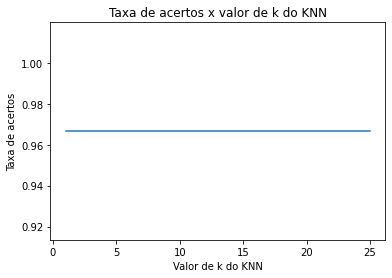

In [ ]:
#### Resposta loop for para diferntes k
k_range = list(range(1,26))
acertos = []
for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(entradas_treino, classes_treino)
    classes_encontradas = modelo.predict(entradas_teste)
    acertos.append(accuracy_score(classes_teste, classes_encontradas))


plt.plot(k_range, acertos)
plt.xlabel('Valor de k do KNN')
plt.ylabel('Taxa de acertos')
plt.title('Taxa de acertos x valor de k do KNN')
plt.show()


### Desafio 4

Refaça os notebook substituindo as entradas (variaveis independentes) e analise se o modelo obtido ficou melhor ou pior.




In [29]:
## implemente sua sua solução....

entradas = df[['sepal_length', 'sepal_width']]
classes = df['species']
print(f"Formato das tabelas de dados {entradas.shape} e classes {classes.shape}")



Formato das tabelas de dados (150, 2) e classes (150,)


In [30]:
entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

Formato das tabelas de dados de treino (120, 2) e teste (30, 2)


In [31]:
entradas_treino.head()

,sepal_length,sepal_width
115,6.4,3.2
31,5.4,3.4
135,7.7,3.0
26,5.0,3.4
66,5.6,3.0


In [32]:
classes_treino.head()

115     Iris-virginica
31         Iris-setosa
135     Iris-virginica
26         Iris-setosa
66     Iris-versicolor
Name: species, dtype: object

In [33]:
k = 9
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(entradas_treino, classes_treino)

KNeighborsClassifier(n_neighbors=9)

In [34]:
classes_encontradas = modelo.predict(entradas_teste)
print("Predição: {}".format(classes_encontradas))

Predição: ['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


In [35]:
acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acerto médio de classificação: ", acertos)

Acerto médio de classificação:  0.6333333333333333


Analise ficou pior

### Desafio 5

Lembra o dataset 'breast_cancer', faça um modelo de predição que informa se o câncer é maligno ou não.


In [142]:
# implemente sua solução......

url = "/breast-cancer.data"

header = ['reocur', 'age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irradiat']

df = pd.read_csv(url, names=header)

df['reocur'] = df.reocur.replace({"no-recurrence-events": 1, "recurrence-events": 2})
df['age'] = df.age.replace({"10-19": 1, "20-29": 2, "30-39": 3, "40-49": 4, "50-59": 5, "60-69": 6, "70-79": 7, "80-89": 8, "90-99": 9})
df['menopause'] = df.menopause.replace({"lt40": 1, "ge40": 2, "premeno": 3})
df['tumor_size'] = df.tumor_size.replace({"0-4": 1, "5-9": 2, "10-14": 3, "15-19": 4, "20-24": 5, "25-29": 6, "30-34": 7, "35-39": 8, "40-44": 9, "45-49": 10, "50-54": 11, "55-59": 12})
df['inv_nodes'] = df.inv_nodes.replace({"0-2": 1, "3-5": 2, "6-8": 3, "9-11": 4, "12-14": 5, "15-17": 6, "18-20": 7, "21-23": 8, "24-26": 9, "27-29": 10, "30-32": 11, "33-35": 12, "36-39": 13})
df['breast'] = df.breast.replace({"left": 1, "right": 2})
df['irradiat'] = df.irradiat.replace({"no": 1, "yes": 2})

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   reocur       286 non-null    int64 
 1   age          286 non-null    int64 
 2   menopause    286 non-null    int64 
 3   tumor_size   286 non-null    int64 
 4   inv_nodes    286 non-null    int64 
 5   node_caps    286 non-null    object
 6   deg_malig    286 non-null    int64 
 7   breast       286 non-null    int64 
 8   breast_quad  286 non-null    object
 9   irradiat     286 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 22.5+ KB
None


In [167]:
entradas = df[['menopause', 'age', 'tumor_size', 'inv_nodes', 'breast', 'irradiat']]
classes = df['deg_malig']
print(f"Formato das tabelas de dados {entradas.shape} e classes {classes.shape}")

Formato das tabelas de dados (286, 6) e classes (286,)


In [168]:
entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

Formato das tabelas de dados de treino (228, 6) e teste (58, 6)


In [169]:
entradas_treino.head()

,menopause,age,tumor_size,inv_nodes,breast,irradiat
188,3,4,3,1,2,1
87,2,7,1,1,1,1
250,3,4,6,1,1,1
30,2,5,9,1,2,1
263,1,5,5,1,1,1


In [170]:
classes_treino.head()

188    2
87     1
250    3
30     3
263    1
Name: deg_malig, dtype: int64

In [190]:
k = 3
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(entradas_treino, classes_treino)

KNeighborsClassifier(n_neighbors=3)

In [191]:
classes_encontradas = modelo.predict(entradas_teste)
print("Predição: {}".format(classes_encontradas))

Predição: [2 2 3 2 1 1 1 1 2 2 1 1 2 2 3 1 3 1 3 2 3 2 1 2 2 2 1 3 2 3 2 2 1 2 2 2 1
 3 3 3 2 1 1 2 2 1 1 3 1 1 3 2 2 2 2 3 2 2]


resultado = 3 siginifica maligno

In [192]:
acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acerto médio de classificação: ", acertos)

Acerto médio de classificação:  0.3620689655172414
